# BIOViewer demo

This demo walks you trough different features of the BIOViewer
1. Single module: How to construct a basic viewer
2. Timestamps: how to construct a viewer that allows you to hop trough timestamps
3. Multiwindow: How to build a viewer that displays multiple signals 


In [1]:
# make the jupyter notebook interactive
import matplotlib.pyplot as plt
%matplotlib widget

In [1]:
# import libraries
from bioviewer import ContinuousViewer
from bioviewer import ContinuousDisplay
import numpy as np

ModuleNotFoundError: No module named 'bioviewer.base_viewer'

In [16]:
# load signal 
signal = np.load('example.npy')
# name channels 
channel_names = ['F3', 'F4', 'C3', 'C4', 'O1', 'O2']
# set frequency
Fs = 128

# Single module

You first need to generate a configuration, which will then be turned into a viewer. 

the most basic information is:
- a numpy file of shape [channels, ts]
- channel names
- signal frequency

it allows you to scroll left and right trough the image and save the image to the specified location by pressing the letter 'z'

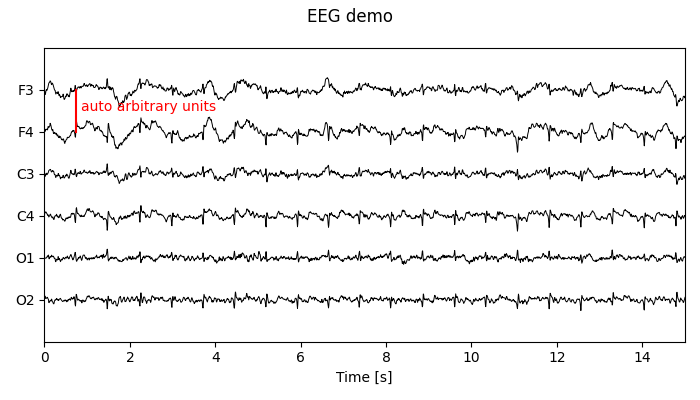

In [17]:
display0 = ContinuousDisplay(signal,Fs, channel_names = channel_names)
viewer = ContinuousViewer(signal_configs=[display0],path_save='Figures',title='EEG demo')

# Timestamps
you can specify timestamps in the viewer
using "n" and "b" you can jump to the timestamps

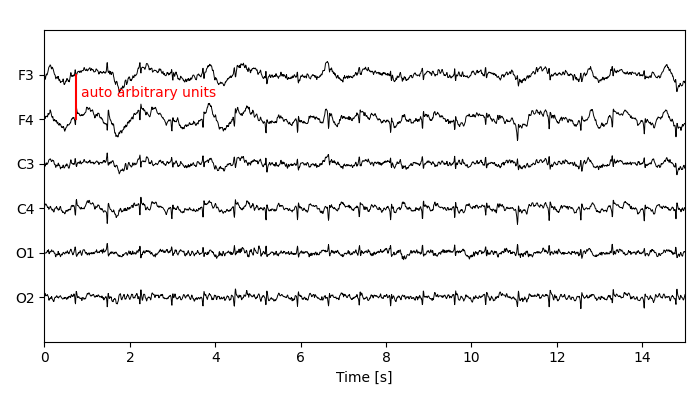

In [18]:
timestamps = [16, 17, 22]

config = ContinuousDisplay(signal,Fs,channel_names)
viewer = ContinuousViewer(signal_configs=[config],timestamps=timestamps)

# Scaling
You can manually set the scale of a signal or let the viewer do it for you. \
To do so manually, set the scale factor (default = 'auto') \
Also, you can display the unit system of your data


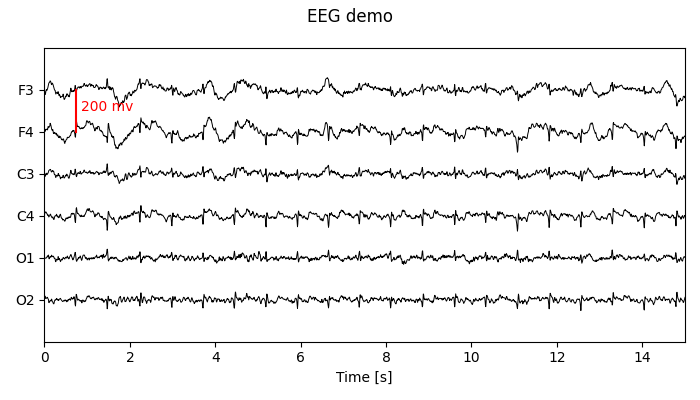

In [19]:
display0 = ContinuousDisplay(signal,Fs,channel_names,scale=200,unit='mv')
viewer = ContinuousViewer(signal_configs=[display0],path_save='Figures',title='EEG demo')

# Multi window

this is where the BIOViewer shows most utility. \
You can build a multiwindow viewer! \
this is useful when ...
* parts of the signal are stored at different locations
* the signals have different frequencies
* you want to display the signal with different functions applied


to show you how it works we are going to plot the same signal twice

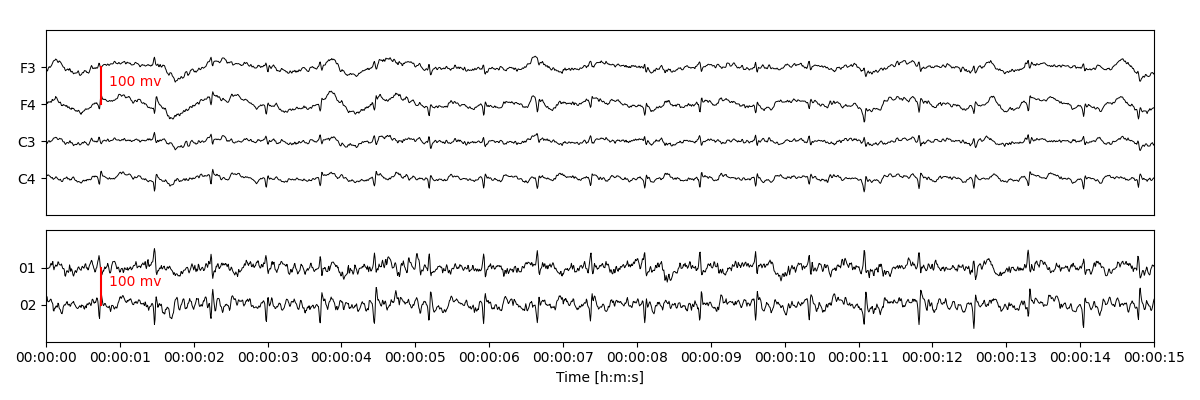

In [20]:
# display 1
signal0 =np.load('example.npy')[:4,:]
channel_names0 = ['F3', 'F4', 'C3', 'C4']

Fs = 128
display0 = ContinuousDisplay(signal0,Fs,channel_names0,t_ticks=False,scale = 100,unit='mv')

signal1 =np.load('example.npy')[4:,:]
channel_names1 = ['01','02']
Fs = 128
display1 = ContinuousDisplay(signal1,Fs,channel_names1,scale=100,unit='mv',real_time=True)

ContinuousViewer(signal_configs=[display0,display1],figsize=(12,4))